## Imports

In [57]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras

## Hyperparameters

In [58]:
EPOCHS = 200
BATCH_SIZE = 128

IMG_HEIGHT = 256
IMG_WIDTH = 256

# Dataset directory
dataset_path = os.environ['DATASET_PATH']
#image_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.jpeg')]
directory_path = pathlib.Path(dataset_path)

## Load the Model

In [59]:
# Load the model
model = keras.models.load_model(os.path.join(os.environ['MODELS_PATH'], 'modelV1(50Epochs).h5'))

In [60]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    # image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.


In [61]:
class_names = train_ds.class_names
print(class_names)

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [62]:
# Take in an image and use the model to predict the class of the image
def predict_image(image_path):
    img = keras.preprocessing.image.load_img(
        image_path, target_size=(IMG_HEIGHT, IMG_WIDTH)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        f'This image most likely belongs to {class_names[np.argmax(score)]} with a {100 * np.max(score)} percent confidence.'
    )

    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 49ms/step
This image most likely belongs to dog with a 90.08333683013916 percent confidence.


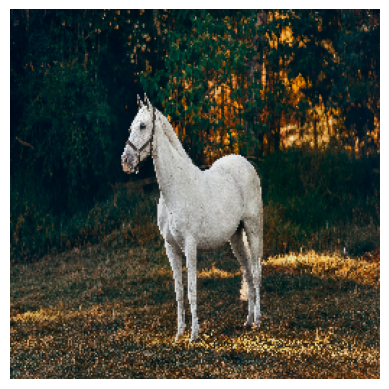

In [63]:
predict_image(os.path.join(os.environ['TEST_IMG_PATH'], 'horse.jpg'))